<a href="https://colab.research.google.com/github/Sanpme66/ProtPeptigram/blob/main/example/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProtPeptigram

![Python Package](https://github.com/Sanpme66/ProtPeptigram/actions/workflows/python-package.yml/badge.svg)
[![PyPI version](https://badge.fury.io/py/protpeptigram.svg)](https://badge.fury.io/py/protpeptigram)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)

## Visualization of Immunopeptides Mapped to Source Proteins Across Multiple Samples

ProtPeptigram provides a comprehensive visualization platform for mapping immunopeptides to their source proteins across different biological samples. This tool enables researchers to identify peptide coverage patterns, analyze density distributions, and compare peptide presentations between experimental conditions.


In [1]:
!pip install protpeptigram

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.3 MB/s eta 0:00:00


In [2]:
!mkdir data
%cd data
!curl -L -O https://github.com/Sanpme66/ProtPeptigram/raw/main/data/JCI146771_Mouse_peptides_peaks_online.csv
!curl -L -O https://github.com/Sanpme66/ProtPeptigram/raw/main/data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta
%cd ..

/content/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1494k  100 1494k    0     0  2112k      0 --:--:-- --:--:-- --:--:-- 47.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11.1M  100 11.1M    0     0  21.1M      0 --:--:-- --:--:-- --:--:-- 21.1M
/content


[04:36:48] Loaded 17951 peptide entries from ./data/JCI146771_Mouse_peptides_peaks_online.csv   ]8;id=117963;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=811698;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=780741;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=420698;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 34444 protein sequences from                                                 ]8;id=353872;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=873389;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                         

           Removed 692 contaminant entries                                                     ]8;id=899352;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=610358;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#269\269]8;;\

[04:37:19] Created formatted data with 9830 peptide-protein-sample combinations                ]8;id=203171;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=780095;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#333\333]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=864416;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=992507;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#334\334]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

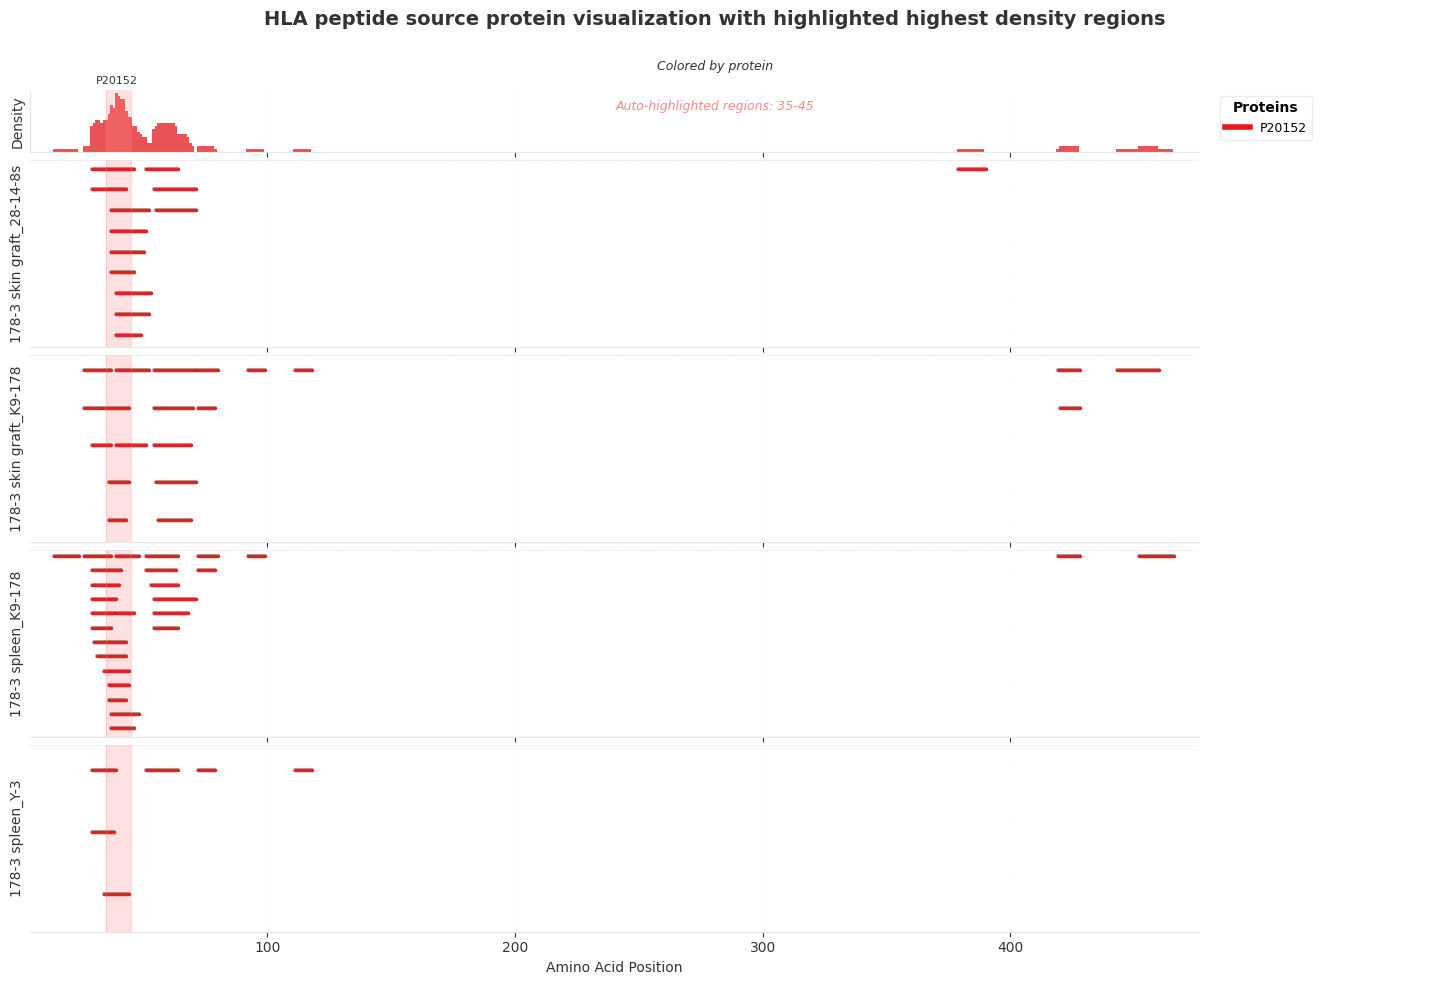

In [4]:
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("./data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=0,
    min_samples=1
)

# Create visualizations
viz = ImmunoViz(formatted_data)
fig, _ = viz.plot_peptigram(
    protein_ids=["P20152"],
    group_by="Sample",
    color_by="protein",
     protein_cmap="Set1",
    title="HLA peptide source protein visualization with highlighted highest density regions",
)

# Save visualization
fig.savefig("protein_visualization.png", dpi=300, bbox_inches="tight")

## Without highlight

[04:37:22] Loaded 17951 peptide entries from ./data/JCI146771_Mouse_peptides_peaks_online.csv   ]8;id=757308;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=995804;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#78\78]8;;\

           Found 6 intensity columns: Intensity_Hep_B10BR_28-14-8s, Intensity_Hep_B10BR_K9-178, ]8;id=608873;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=741792;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#93\93]8;;\
           Intensity_178-3 skin graft_28-14-8s, Intensity_178-3 skin graft_K9-178,                                 
           Intensity_178-3 spleen_K9-178, Intensity_178-3 spleen_Y-3                                               

           Loaded 34444 protein sequences from                                                 ]8;id=153578;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=296542;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#125\125]8;;\
           ./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta                                         

           Removed 692 contaminant entries                                                     ]8;id=276804;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=112781;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#269\269]8;;\

[04:37:23] Removed 0 entries below intensity threshold of 0 or minimum sample count of 2       ]8;id=460400;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=79804;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#279\279]8;;\

[04:37:47] Created formatted data with 9830 peptide-protein-sample combinations                ]8;id=869561;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=694672;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#333\333]8;;\

           PTMs were removed for position finding. Original peptides preserved in 'Peptide'    ]8;id=22846;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py\DataProcessor.py]8;;\:]8;id=476858;file:///usr/local/lib/python3.11/dist-packages/ProtPeptigram/DataProcessor.py#334\334]8;;\
           column, clean versions in 'CleanPeptide' column.                                                        

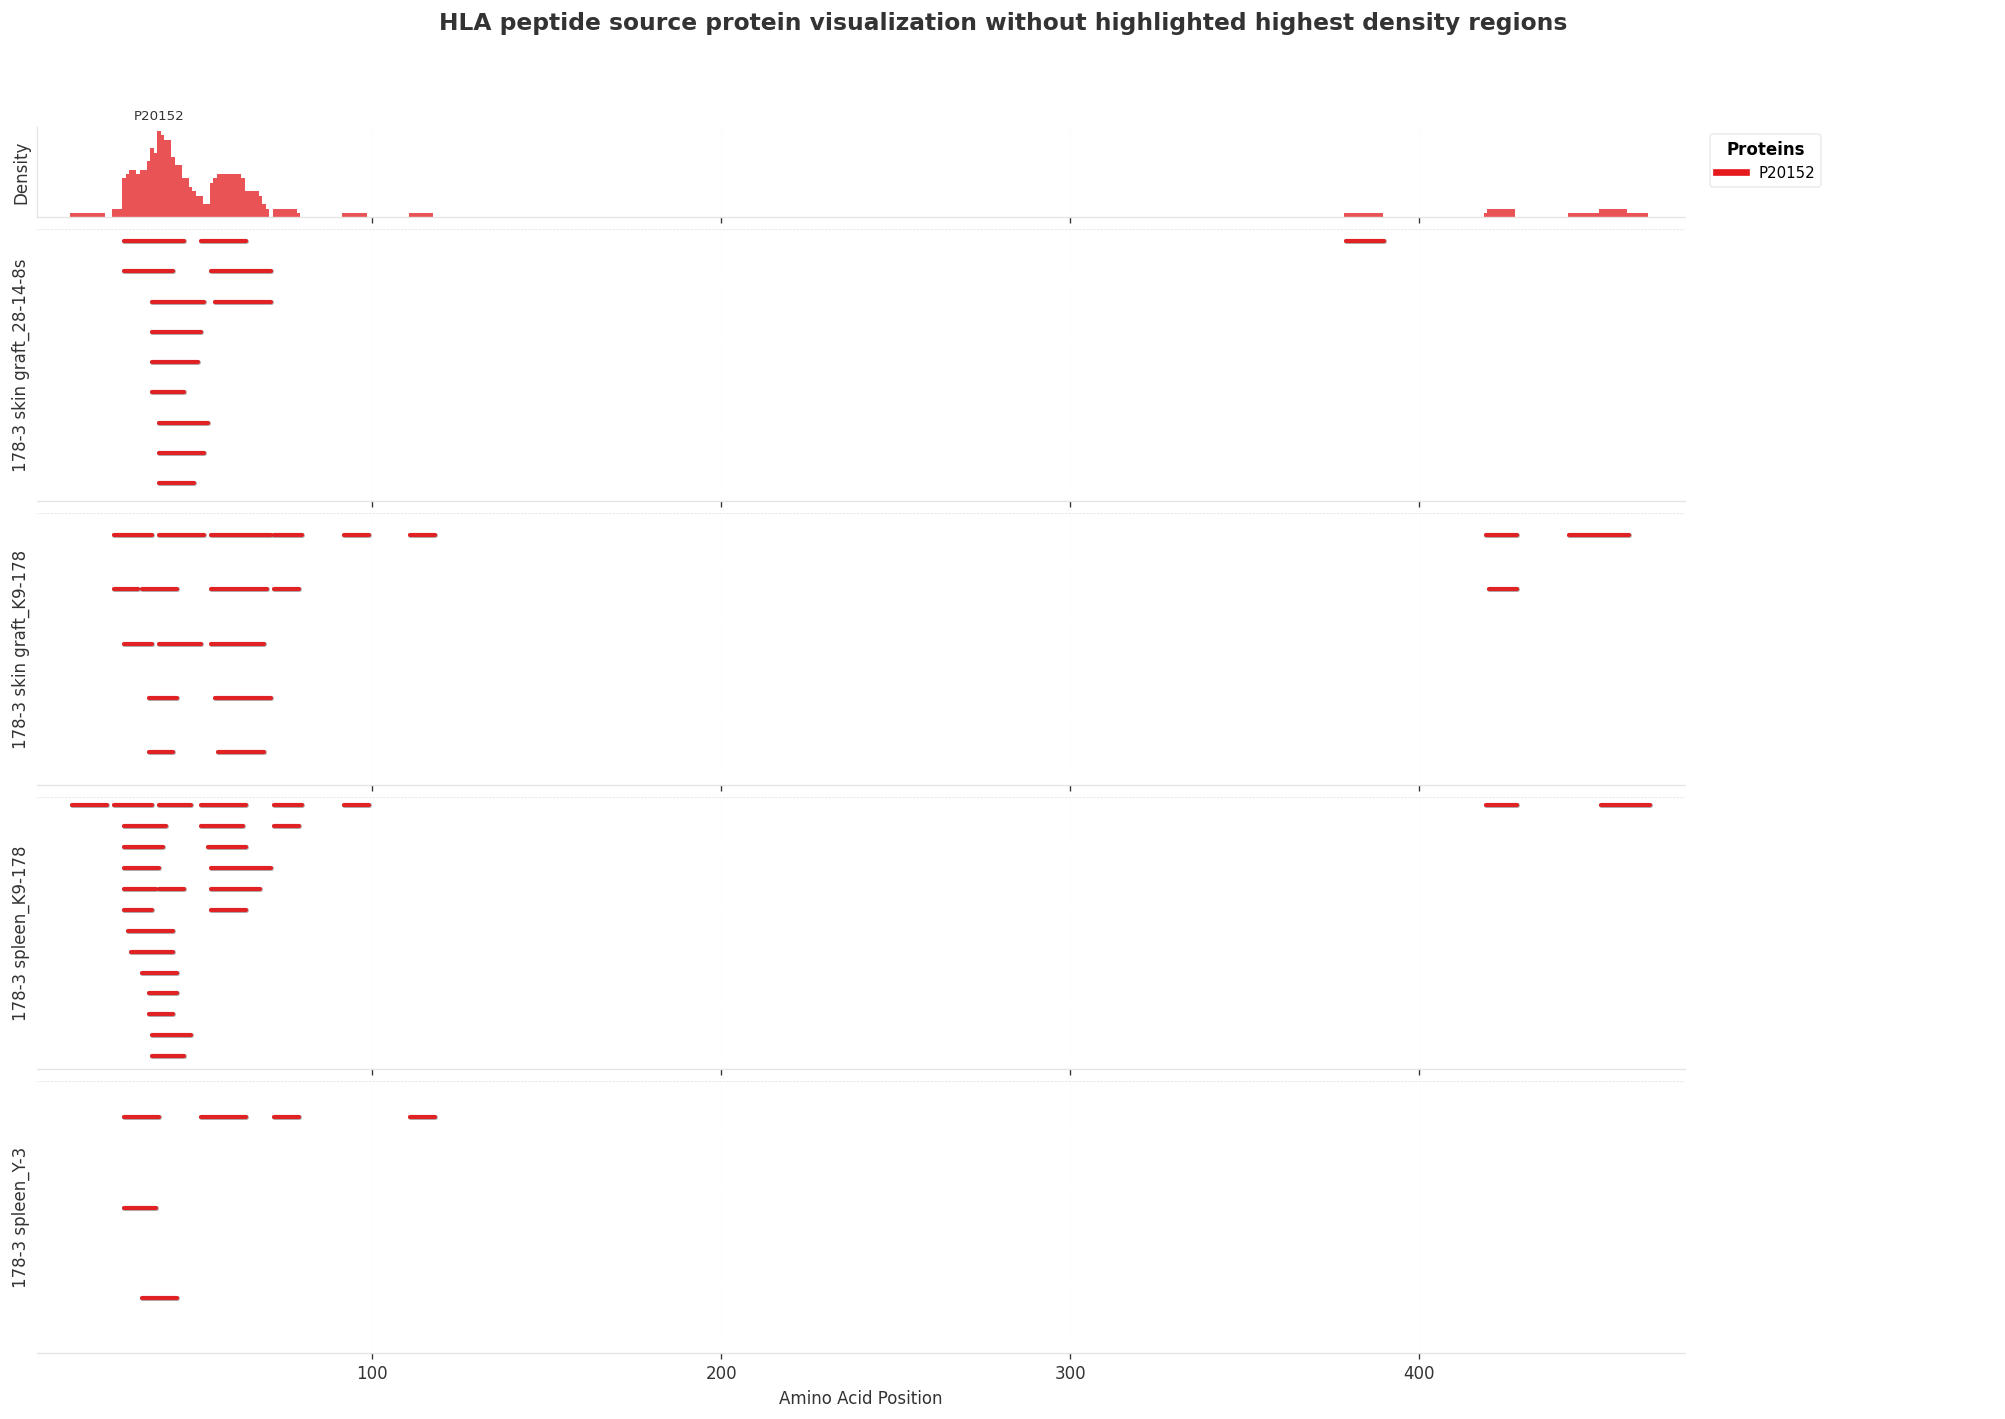

In [5]:
from ProtPeptigram.DataProcessor import PeptideDataProcessor
from ProtPeptigram.viz import ImmunoViz

# Initialize data processor
processor = PeptideDataProcessor()

# Load data
processor.load_peaks_data("./data/JCI146771_Mouse_peptides_peaks_online.csv")
processor.load_protein_sequences("./data/uniprotkb_proteome_UP000000589_AND_revi_2025_03_12.fasta")

# Process data
formatted_data = processor.filter_and_format_data(
    filter_contaminants=True,
    intensity_threshold=0,
    min_samples=2
)

# Create visualizations
viz = ImmunoViz(formatted_data)
# fig, _ = viz.plot_peptigram(
#     protein_ids=["P20152"],
#     group_by="Sample",
#     color_by="protein",
#     title="HLA Peptide Visualization"
# )


fig, _ = viz.plot_peptigram(
    ['P20152'],#'P32261'], #['P20152','P32261','Q9QX47'],
    group_by='Sample',
    color_by='test',
    figsize=(14, 12),
    title="HLA peptide source protein visualization without highlighted highest density regions",
    color_by_protein_and_intensity=False,
    # Assign specific colormaps to each protein
    # intensity_cmaps=["Blues", "Reds", "Greens", "Purples"],
    protein_cmap="Set1",
    external_legend=True,
    highlight=False,
    auto_highlight=False,
    highlight_alpha=100,
    auto_highlight_threshold=0.8,
    auto_highlight_window=10,
    dpi=120
)


# # Save visualization
# fig.savefig("protein_visualization_without_h.png", dpi=300, bbox_inches="tight")



In [ ]:
!ls ../

ProtPeptigram          data                   pytest.ini
ProtPeptigram.egg-info dev-notes.txt          requirements.txt
README.md              dist                   setup.py
__init__.py            example                test
build                  main.py


In [ ]:
for Protein in formatted_data['Protein']:
    print(Protein)
    # print(formatted_data[formatted_data['Protein'] == Protein])
    # print(formatted_data[formatted_data['Protein'] == Protein].iloc[0]['Peptide'])
    # print(formatted_data[formatted_data['Protein'] == Protein].iloc[0]['Intensity'])
    # print(formatted_data[formatted_data['Protein'] == Protein].iloc[0]['Sample'])

P97481
P97481
P97481
P97481
Q8VE09
Q8VE09
Q8VE09
Q8VE09
P42227
P42227
P42227
P63085
P63085
P63085
P54823
P54823
P54823
Q02248
Q02248
Q02248
Q6ZWY9:P10853:Q64525:Q8CGP1
Q6ZWY9:P10853:Q64525:Q8CGP1
Q6ZWY9:P10853:Q64525:Q8CGP1
Q62425
Q62425
Q62425
Q9JHU4
Q9JHU4
Q9JHU4
Q9JHU4
P60710:P63260:Q8BFZ3
P60710:P63260:Q8BFZ3
P60710:P63260:Q8BFZ3
P62751
P62751
Q60668
Q60668
P29351
P29351
P29351
P01902:P01901:P04223
P01902:P01901:P04223
P01902:P01901:P04223
Q8C4B4
Q8C4B4
Q8C4B4
Q60605
Q60605
Q60605
Q60605
P97481
P97481
P97481
Q920Q4
Q920Q4
Q64343
Q64343
Q64343
Q7M6Y3
Q7M6Y3
Q7M6Y3
Q9CZM2
Q9CZM2
Q99020
Q99020
Q99020
Q99020
P01902:P01901:P04223
P01902:P01901:P04223
P01902:P01901:P04223
Q922Q1
Q922Q1
Q60598
Q60598
Q9CPV7
Q9CPV7
Q6ZWY9:P10853:Q64525:Q8CGP1:Q8CGP0:Q9D2U9:Q64524
Q6ZWY9:P10853:Q64525:Q8CGP1:Q8CGP0:Q9D2U9:Q64524
Q6ZWY9:P10853:Q64525:Q8CGP1:Q8CGP0:Q9D2U9:Q64524
Q9D6T0
Q9D6T0
Q9D6T0
P47753
P47753
P68373:P05213:P68368:Q9JJZ2
P68373:P05213:P68368:Q9JJZ2
P68373:P05213:P68368:Q9JJZ2
P01887
P01887